<a href="https://colab.research.google.com/github/Yathang007/Time-Series-Forecasting-using-LSTM/blob/main/Assignment_5_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Yathang tupe

PRN - 202201070076

Batch -T4

Group Members - Priyanka Kadam , Aditi Kulkarni


**Experiment 5.1:**

Objective:
To forecast future values of a univariate time series using LSTM-based models.

dataset link - https://www.kaggle.com/datasets/rakannimer/air-passengers

Expected Outcome:

Prediction vs actual plot

RMSE/MAE values

**1. Data Preparation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakannimer/air-passengers")

print("Path to dataset files:", path)


# Load the dataset
# Assuming the dataset is a CSV file named 'AirPassengers.csv'
# and contains a column named '#Passengers' with the passenger data
df = pd.read_csv(path + '/AirPassengers.csv', index_col='Month')
values = df['#Passengers'].values # Extract the '#Passengers' column values


# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values.reshape(-1, 1))

# Create time steps
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data)-time_steps):
        X.append(data[i:(i+time_steps), 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 12  # Using 12 months as lookback for annual pattern
X, y = create_dataset(scaled_values, time_steps)

# Split into train/test
train_size = int(len(X) * 0.67)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Path to dataset files: /kaggle/input/air-passengers


**2. LSTM Model Architecture**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**3. Model Training**

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step - loss: 0.0425 - val_loss: 0.2410
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0206 - val_loss: 0.1308
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0072 - val_loss: 0.0535
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0061 - val_loss: 0.0221
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0117 - val_loss: 0.0200
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0135 - val_loss: 0.0228
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0085 - val_loss: 0.0320
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0063 - val_loss: 0.0409
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0053 - val_loss: 0.0435
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0050 - val_loss: 0.0398
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0043 - val_loss: 0.0325
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0046 - val_l

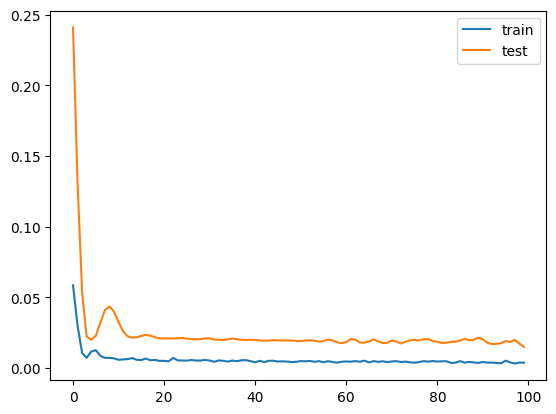

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1,
    shuffle=False
)

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

**4. Model Evaluation**

In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE and MAE
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
train_mae = mean_absolute_error(y_train[0], train_predict[:,0])
test_mae = mean_absolute_error(y_test[0], test_predict[:,0])

print(f'Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}')
print(f'Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Train RMSE: 28.76, Test RMSE: 63.21
Train MAE: 22.79, Test MAE: 48.43


**5. Visualization**

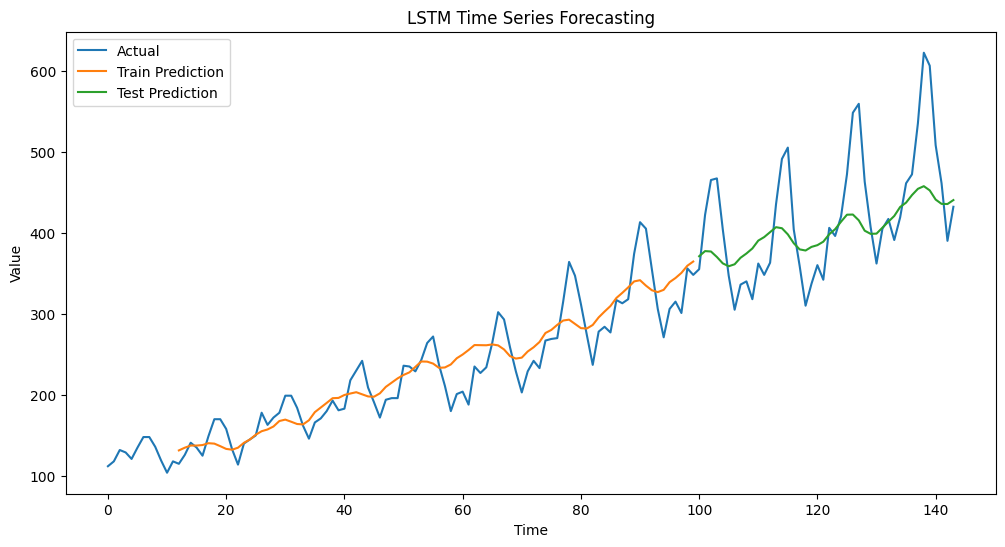

In [ ]:
# Shift train predictions for plotting
train_predict_plot = np.empty_like(values, dtype=float) # Change the dtype to float
train_predict_plot[:] = np.nan
train_predict_plot[time_steps:len(train_predict)+time_steps] = train_predict[:,0]

# Shift test predictions for plotting
test_predict_plot = np.empty_like(values, dtype=float) # Change the dtype to float
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict)+(time_steps):len(train_predict)+(time_steps)+len(test_predict)] = test_predict[:,0] #Modified indexing

# Plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(values, label='Actual')
plt.plot(train_predict_plot, label='Train Prediction')
plt.plot(test_predict_plot, label='Test Prediction')
plt.legend()
plt.title('LSTM Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

**Experiment 5.2: Sequence Text Prediction using LSTM**

 Objective:
To generate next characters/words based on a given input sequence using LSTM.

dataset- Shakespeare’s Text (TensorFlow Datasets)

Expected Outcome:

Auto-generated text samples

Training accuracy/loss plots

**1. Data Preparation (Character-Level)**

Epoch 1/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 3.3949Epoch 1 took 282.25 seconds
86/86 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - loss: 3.3901
Epoch 2/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2.3364Epoch 2 took 289.28 seconds
86/86 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - loss: 2.3355
Epoch 3/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2.0875Epoch 3 took 259.85 seconds
86/86 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - loss: 2.0870
Epoch 4/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.9291Epoch 4 took 244.29 seconds
86/86 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - loss: 1.9288
Epoch 5/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.8160Epoch 5 took 244.14 seconds
86/86 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - loss: 1.8158
Epoch 6/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.7277Epoch 6 took 263.22 seconds
86/86 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - loss: 1.7275
Epoch 7/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.6608Epoch 7 took 243.28 seconds
86/86 ━━━━━━━━━━━━━━━━━━━━ 243s 3

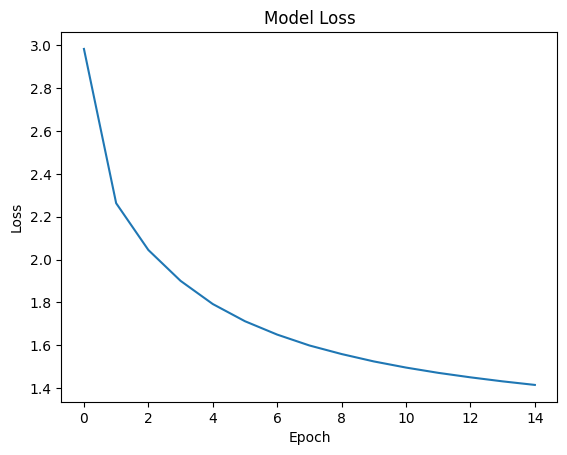

ROMEO: thank you?

POMPEY:
And then thee now I did heard and mark and years.

FLORIZEL:
Here well steed to way. I will still have not suse the sight
Is not she know not the peace to make low's head.

Second 


In [ ]:
import tensorflow as tf
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load and preprocess data (preserving case)
path_to_file = tf.keras.utils.get_file(
    'shakespeare.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'
)
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')  # Removed .lower()

# Character-level processing
vocab = sorted(set(text))
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)
text_as_int = np.array([char2idx[c] for c in text])

# Create training sequences
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

# Batch and prefetch data
BATCH_SIZE = 128
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

# Build the model
vocab_size = len(vocab)
embedding_dim = 128
rnn_units = 512

def build_model(batch_size):
    model = Sequential([
        tf.keras.layers.Input(batch_shape=(batch_size, None)),
        Embedding(vocab_size, embedding_dim),
        LSTM(rnn_units, return_sequences=True, stateful=True),
        Dense(vocab_size)
    ])
    return model

# Create and compile model
model = build_model(BATCH_SIZE)

def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)

# Callbacks
checkpoint_dir = './training_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=3,
    restore_best_weights=True)

class TimeCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1} took {time.time()-self.epoch_start_time:.2f} seconds")

# Train the model
EPOCHS = 15
history = model.fit(
    dataset,
    epochs=EPOCHS,
    callbacks=[checkpoint_callback, early_stopping, TimeCallback()],
    verbose=1
)

# Plot training history
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Text generation function
def generate_text(model, start_string, num_generate=200, temperature=1.0):
    # Create prediction model
    prediction_model = build_model(batch_size=1)
    prediction_model.set_weights(model.get_weights())

    # Vectorize the start string
    input_eval = [char2idx.get(s, 0) for s in start_string]  # Default to 0 if character not found
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []
    # Remove reset_states call for stateless LSTM
    # prediction_model.reset_states()

    for _ in range(num_generate):
        predictions = prediction_model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

# Generate sample text (now works with uppercase)
print(generate_text(model, start_string=u"ROMEO: ", temperature=0.7))

# Experiment 5.3: Sequence Text Classification using LSTM

 Objective:
To classify text sequences using LSTM-based models (e.g., sentiment or spam detection).

dataset - SMS Spam Collection Dataset

Expected Outcome:

Classification metrics: accuracy, precision, F1-score

Confusion matrix visualization



Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.8697 - loss: 0.4258 - val_accuracy: 0.8664 - val_loss: 0.3941
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.8653 - loss: 0.3973 - val_accuracy: 0.8664 - val_loss: 0.3949
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.8644 - loss: 0.3986 - val_accuracy: 0.8664 - val_loss: 0.3936
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.8636 - loss: 0.4014 - val_accuracy: 0.8664 - val_loss: 0.3936
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.8581 - loss: 0.4091 - val_accuracy: 0.8664 - val_loss: 0.3984


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
              precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       966
        Spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


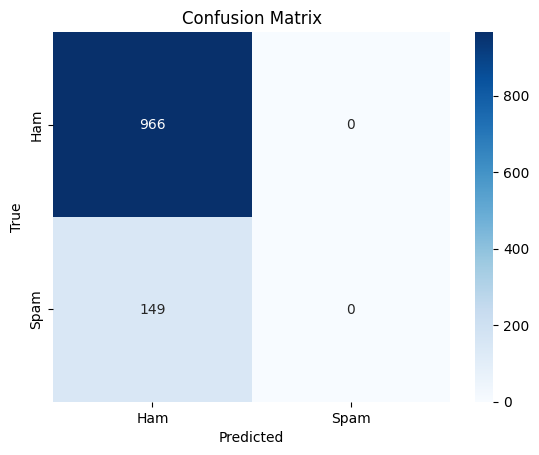

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'text'])

# Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, padding='post', maxlen=100)

X = padded
y = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64, input_length=100),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Predict
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Metrics
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


I, Yathang Tupe , confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link:

Signature: Yathang Tupe